In [124]:
! git status

On branch ELI
Your branch is up to date with 'origin/ELI'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Final Notebook.ipynb
	Imani .ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [1]:
! pwd

/Users/imanithompson/Documents/Flatiron/Project/Vaccine_Project


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [3]:
features =pd.read_csv('../../../../Downloads/Data/training_set_features.csv')

In [4]:
labels =pd.read_csv('../../../../Downloads/Data/training_set_labels.csv')

In [5]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [7]:
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo





## drop unnecessary columsn (need only seasonal columns)

In [9]:
labels =labels.drop(columns='h1n1_vaccine')
labels

,respondent_id,seasonal_vaccine
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
26702,26702,0
26703,26703,0
26704,26704,1
26705,26705,0


In [10]:



features2 =features.drop(columns=['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'])

In [11]:
features2 = features2.drop(columns= ['employment_industry', 'employment_occupation'])

In [12]:
features2 = features2.drop(columns=['census_msa', "hhs_geo_region"])

In [13]:
features2

,respondent_id,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
0,0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0
1,1,0.0,0.0,0.0,0.0,1.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,0.0,0.0
2,2,NaN,1.0,0.0,0.0,NaN,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,2.0,0.0
3,3,1.0,1.0,0.0,0.0,NaN,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0
4,4,0.0,0.0,0.0,0.0,NaN,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.0,0.0,0.0,0.0,NaN,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,0.0,0.0
26703,26703,1.0,0.0,0.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,1.0,0.0
26704,26704,0.0,0.0,0.0,0.0,NaN,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,0.0,0.0
26705,26705,0.0,0.0,0.0,0.0,0.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,1.0,0.0


In [14]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   respondent_id          26707 non-null  int64  
 1   doctor_recc_seasonal   24547 non-null  float64
 2   chronic_med_condition  25736 non-null  float64
 3   child_under_6_months   25887 non-null  float64
 4   health_worker          25903 non-null  float64
 5   health_insurance       14433 non-null  float64
 6   age_group              26707 non-null  object 
 7   education              25300 non-null  object 
 8   race                   26707 non-null  object 
 9   sex                    26707 non-null  object 
 10  income_poverty         22284 non-null  object 
 11  marital_status         25299 non-null  object 
 12  rent_or_own            24665 non-null  object 
 13  employment_status      25244 non-null  object 
 14  household_adults       26458 non-null  float64
 15  ho

In [15]:
features2['vaccine_status'] = labels['seasonal_vaccine']

In [16]:
features2

,respondent_id,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,vaccine_status
0,0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,1.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,0.0,0.0,1
2,2,NaN,1.0,0.0,0.0,NaN,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,2.0,0.0,0
3,3,1.0,1.0,0.0,0.0,NaN,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,NaN,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.0,0.0,0.0,0.0,NaN,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,0.0,0.0,0
26703,26703,1.0,0.0,0.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,1.0,0.0,0
26704,26704,0.0,0.0,0.0,0.0,NaN,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,0.0,0.0,1
26705,26705,0.0,0.0,0.0,0.0,0.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,1.0,0.0,0


## Modelless baseline

In [18]:
y_train.value_counts(normalize=True)

NameError: name 'y_train' is not defined

In [19]:
preds = [0] * len(y_train)

NameError: name 'y_train' is not defined

In [20]:
accuracy_score(y_train, preds)

NameError: name 'y_train' is not defined

In [21]:
labels['seasonal_vaccine']

0        0
1        1
2        0
3        1
4        0
        ..
26702    0
26703    0
26704    1
26705    0
26706    0
Name: seasonal_vaccine, Length: 26707, dtype: int64

In [22]:
len(preds)

NameError: name 'preds' is not defined

## cleaning attempt?

In [17]:
features2.isna().sum()

respondent_id                0
doctor_recc_seasonal      2160
chronic_med_condition      971
child_under_6_months       820
health_worker              804
health_insurance         12274
age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
household_adults           249
household_children         249
vaccine_status               0
dtype: int64

Not important start

In [18]:
features2['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [19]:
features2.loc[(features2['marital_status'] != 'Married') & (features2['marital_status'] != 'Not Married')]
# ignore

,respondent_id,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,vaccine_status
64,64,0.0,NaN,NaN,NaN,NaN,45 - 54 Years,NaN,Other or Multiple,Female,NaN,NaN,NaN,NaN,1.0,2.0,0
68,68,1.0,0.0,0.0,0.0,1.0,65+ Years,NaN,White,Female,NaN,NaN,Own,Not in Labor Force,1.0,0.0,1
75,75,1.0,1.0,0.0,0.0,NaN,45 - 54 Years,NaN,White,Male,NaN,NaN,NaN,NaN,1.0,2.0,1
94,94,NaN,0.0,0.0,0.0,NaN,35 - 44 Years,NaN,Hispanic,Female,NaN,NaN,NaN,NaN,1.0,3.0,0
105,105,0.0,0.0,NaN,NaN,NaN,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26549,26549,0.0,NaN,NaN,NaN,NaN,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,1.0,2.0,1
26565,26565,0.0,1.0,0.0,0.0,NaN,18 - 34 Years,Some College,White,Male,NaN,NaN,NaN,NaN,1.0,2.0,0
26608,26608,0.0,NaN,NaN,NaN,NaN,65+ Years,NaN,Other or Multiple,Female,NaN,NaN,NaN,NaN,0.0,0.0,0
26672,26672,1.0,NaN,NaN,NaN,NaN,18 - 34 Years,NaN,Black,Female,NaN,NaN,NaN,NaN,NaN,NaN,1


education

In [20]:
features2['education'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [21]:
features2['education'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
26702    False
26703    False
26704    False
26705    False
26706    False
Name: education, Length: 26707, dtype: bool

In [22]:
features2['income_poverty'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

not important stop

In [23]:
features2['health_insurance'] = features2['health_insurance'].fillna(0.0)

In [24]:
features2['income_poverty'].mode()

0    <= $75,000, Above Poverty
dtype: object

In [25]:
features2['income_poverty'].fillna('<= $75,000, Above Poverty', inplace=True)

In [26]:
features2['income_poverty'].isna().sum()

0

In [27]:
features2 = features2.dropna()

In [28]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   respondent_id          22319 non-null  int64  
 1   doctor_recc_seasonal   22319 non-null  float64
 2   chronic_med_condition  22319 non-null  float64
 3   child_under_6_months   22319 non-null  float64
 4   health_worker          22319 non-null  float64
 5   health_insurance       22319 non-null  float64
 6   age_group              22319 non-null  object 
 7   education              22319 non-null  object 
 8   race                   22319 non-null  object 
 9   sex                    22319 non-null  object 
 10  income_poverty         22319 non-null  object 
 11  marital_status         22319 non-null  object 
 12  rent_or_own            22319 non-null  object 
 13  employment_status      22319 non-null  object 
 14  household_adults       22319 non-null  float64
 15  ho

In [29]:
features2.describe(include="O")

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status
count,22319,22319,22319,22319,22319,22319,22319,22319
unique,5,4,4,2,3,2,2,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed
freq,5643,8985,17857,13354,13668,12050,16983,12091


In [30]:
features2.describe()

,respondent_id,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,household_adults,household_children,vaccine_status
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,13339.521887,0.332318,0.286841,0.082755,0.113939,0.529056,0.895829,0.524755,0.479502
std,7704.463797,0.471055,0.452297,0.275517,0.317744,0.499166,0.752890,0.920830,0.499591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6684.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13312.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,20010.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000


In [31]:
features2['income_poverty'].value_counts()

<= $75,000, Above Poverty    13668
> $75,000                     6272
Below Poverty                 2379
Name: income_poverty, dtype: int64

In [32]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   respondent_id          22319 non-null  int64  
 1   doctor_recc_seasonal   22319 non-null  float64
 2   chronic_med_condition  22319 non-null  float64
 3   child_under_6_months   22319 non-null  float64
 4   health_worker          22319 non-null  float64
 5   health_insurance       22319 non-null  float64
 6   age_group              22319 non-null  object 
 7   education              22319 non-null  object 
 8   race                   22319 non-null  object 
 9   sex                    22319 non-null  object 
 10  income_poverty         22319 non-null  object 
 11  marital_status         22319 non-null  object 
 12  rent_or_own            22319 non-null  object 
 13  employment_status      22319 non-null  object 
 14  household_adults       22319 non-null  float64
 15  ho

In [33]:
features2['employment_status'].value_counts()

Employed              12091
Not in Labor Force     8937
Unemployed             1291
Name: employment_status, dtype: int64

In [34]:
features2['employment_status'] = features2['employment_status'].replace('Not in Labor Force', 'Unemployed')

<ipython-input-34-8a59e63f9576>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features2['employment_status'] = features2['employment_status'].replace('Not in Labor Force', 'Unemployed')


In [35]:
features2['employment_status'].value_counts()

Employed      12091
Unemployed    10228
Name: employment_status, dtype: int64

In [36]:
features2['income_poverty'].value_counts()

<= $75,000, Above Poverty    13668
> $75,000                     6272
Below Poverty                 2379
Name: income_poverty, dtype: int64

In [37]:
features2['income_poverty'] = features2['income_poverty'].replace('> $75,000', 'Below Poverty').replace('<= $75,000, Above Poverty','Above Poverty' )

<ipython-input-37-48199004278e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features2['income_poverty'] = features2['income_poverty'].replace('> $75,000', 'Below Poverty').replace('<= $75,000, Above Poverty','Above Poverty' )


In [38]:
features2['income_poverty'].value_counts()

Above Poverty    13668
Below Poverty     8651
Name: income_poverty, dtype: int64

In [39]:
features2

,respondent_id,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,vaccine_status
0,0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Unemployed,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,1.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,0.0,0.0,1
3,3,1.0,1.0,0.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Unemployed,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,0.0,45 - 54 Years,Some College,White,Female,Above Poverty,Married,Own,Employed,1.0,0.0,0
5,5,1.0,0.0,0.0,0.0,0.0,65+ Years,12 Years,White,Male,Above Poverty,Married,Own,Employed,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,26701,0.0,0.0,1.0,0.0,1.0,18 - 34 Years,College Graduate,White,Female,Below Poverty,Not Married,Rent,Unemployed,3.0,0.0,0
26702,26702,0.0,0.0,0.0,0.0,0.0,65+ Years,Some College,White,Female,Above Poverty,Not Married,Own,Unemployed,0.0,0.0,0
26703,26703,1.0,0.0,0.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,Above Poverty,Not Married,Rent,Employed,1.0,0.0,0
26705,26705,0.0,0.0,0.0,0.0,0.0,18 - 34 Years,Some College,Hispanic,Female,Above Poverty,Married,Rent,Employed,1.0,0.0,0


In [40]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   respondent_id          22319 non-null  int64  
 1   doctor_recc_seasonal   22319 non-null  float64
 2   chronic_med_condition  22319 non-null  float64
 3   child_under_6_months   22319 non-null  float64
 4   health_worker          22319 non-null  float64
 5   health_insurance       22319 non-null  float64
 6   age_group              22319 non-null  object 
 7   education              22319 non-null  object 
 8   race                   22319 non-null  object 
 9   sex                    22319 non-null  object 
 10  income_poverty         22319 non-null  object 
 11  marital_status         22319 non-null  object 
 12  rent_or_own            22319 non-null  object 
 13  employment_status      22319 non-null  object 
 14  household_adults       22319 non-null  float64
 15  ho

In [41]:
features2['age_group'].value_counts()

65+ Years        5643
55 - 64 Years    4746
45 - 54 Years    4446
18 - 34 Years    4314
35 - 44 Years    3170
Name: age_group, dtype: int64

In [58]:
X = features2.drop(columns='vaccine_status')
y = features2['vaccine_status']
X_cols = X.columns
X, X_hold, y, y_hold = train_test_split(X, y, random_state=42, test_size=.05)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [59]:
X_train = pd.DataFrame(X_train, columns=X_cols)

In [60]:
X_train.head()

,respondent_id,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
4504,4504,0.0,1.0,0.0,1.0,0.0,18 - 34 Years,Some College,Hispanic,Female,Below Poverty,Not Married,Own,Unemployed,2.0,2.0
22120,22120,0.0,0.0,0.0,0.0,0.0,35 - 44 Years,College Graduate,White,Female,Below Poverty,Married,Own,Employed,1.0,1.0
17539,17539,0.0,0.0,0.0,0.0,0.0,18 - 34 Years,Some College,White,Male,Above Poverty,Not Married,Rent,Unemployed,2.0,1.0
25935,25935,0.0,0.0,0.0,0.0,1.0,18 - 34 Years,< 12 Years,Other or Multiple,Female,Above Poverty,Married,Rent,Employed,1.0,0.0
6734,6734,0.0,0.0,0.0,0.0,1.0,18 - 34 Years,12 Years,Black,Female,Below Poverty,Not Married,Own,Employed,1.0,1.0


In [61]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
len(cat_columns)

8

In [62]:
[c for c in X_train.columns if X_train[c].dtype in ['int64', 'float64']]

['respondent_id',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'household_adults',
 'household_children']

In [63]:
num_columns = [
'respondent_id',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'household_adults',
 'household_children'
]

len(num_columns)

8

In [64]:
cat_columns

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status']

In [65]:
num_columns

['respondent_id',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'household_adults',
 'household_children']

In [66]:
used_cols = [*cat_columns, *num_columns]
used_cols

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'respondent_id',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'household_adults',
 'household_children']

In [67]:
cat_transformer = OneHotEncoder(drop='first')

num_transformer = StandardScaler()

In [68]:
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [69]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Accuracy: {accuracy_score(y_train, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_probas):.4f}")
    print("*" * 20)
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_probas):.4f}")

In [70]:
dt = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=10))
])

dt.fit(X_train[used_cols], y_train)

train_preds = dt.predict(X_train[used_cols])
test_preds = dt.predict(X_test[used_cols])

train_probas = dt.predict_proba(X_train[used_cols])[:,1]
test_probas = dt.predict_proba(X_test[used_cols])[:,1]

Train F1: 0.7238
Train Accuracy: 0.7500
Train Precision: 0.7709
Train ROC-AUC: 0.8320
********************
Test F1: 0.6617
Test Accuracy: 0.7006
Test Precision: 0.7045
Test ROC-AUC: 0.7361


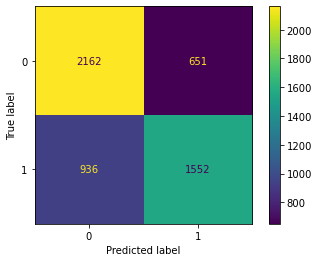

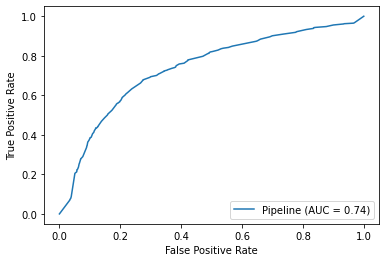

In [71]:
evaluate(dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

In [72]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

lr.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first'),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status']),
                                                 ('nums', StandardScaler(),
                                                  ['respondent_id',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                       

Train F1: 0.6820
Train Accuracy: 0.7054
Train Precision: 0.7080
Train ROC-AUC: 0.7758
********************
Test F1: 0.6858
Test Accuracy: 0.7136
Test Precision: 0.7069
Test ROC-AUC: 0.7840


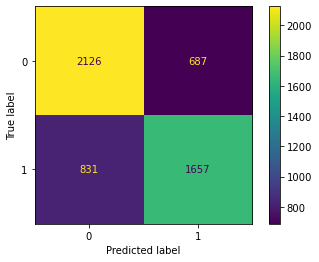

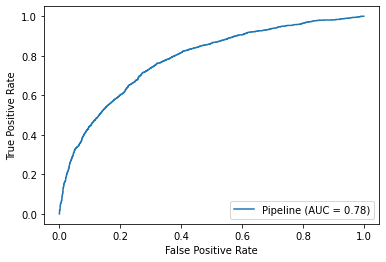

In [73]:
evaluate(lr, X_train[used_cols], X_test[used_cols], y_train, y_test)

In [74]:
nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB())
])

nb.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first'),
                                                  ['age_group', 'education',
                                                   'race', 'sex',
                                                   'income_poverty',
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status']),
                                                 ('nums', StandardScaler(),
                                                  ['respondent_id',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                       

Train F1: 0.6802
Train Accuracy: 0.6803
Train Precision: 0.6545
Train ROC-AUC: 0.7374
********************
Test F1: 0.6804
Test Accuracy: 0.6874
Test Precision: 0.6541
Test ROC-AUC: 0.7423


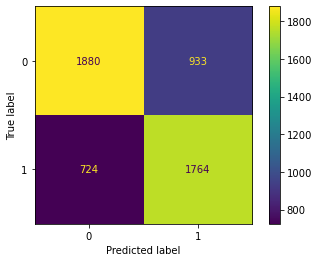

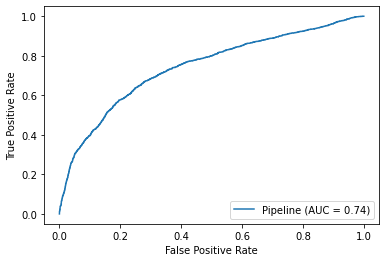

In [75]:
evaluate(nb, X_train[used_cols], X_test[used_cols], y_train, y_test)

knn

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
scaler = StandardScaler()

In [77]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer(transformers = [
    ('num_transformer', num_transformer, num_columns),
    ('cat_transformer', cat_transformer, cat_columns)
])



In [78]:
kn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', knn)
])

In [79]:
kn.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['respondent_id',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance',
                                                   'household_adults',
                                                   'household_children']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
       

Train F1: 0.7581
Train Accuracy: 0.7678
Train Precision: 0.7584
Train ROC-AUC: 0.8502
********************
Test F1: 0.6603
Test Accuracy: 0.6763
Test Precision: 0.6505
Test ROC-AUC: 0.7271


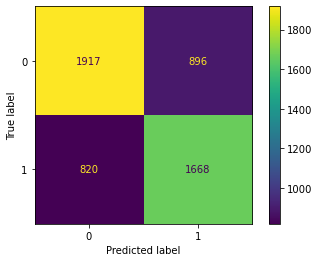

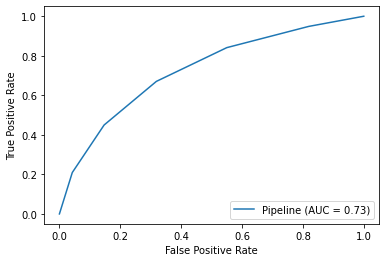

In [80]:
evaluate(kn, X_train[used_cols], X_test[used_cols], y_train, y_test)

exploring hyperparameters

In [81]:
# ada_i = AdaBoostClassifier(random_state=42, learning_rate=.1, n_estimators=100)

In [82]:
ada = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ada_i',AdaBoostClassifier(random_state=42) )
])

param_grid = {
    'ada_i__learning_rate': [.01, .1, .5, 1],
    'ada_i__n_estimators': [10, 50, 100, 1000]
}

# Create our grid search
gs = GridSearchCV(estimator=ada, param_grid=param_grid, cv = 5)

# Fit our grid search
gs.fit(X_train[used_cols], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['respondent_id',
                                                                          'doctor_recc_seasonal',
                                                                          'chronic_med_condition',
                                                                          'child_under_6_months',
                                                                          'health_worker',
                                                                          'health_insurance',
                                                   

In [83]:
print(f"Train Score: {gs.best_estimator_.score(X_train[used_cols], y_train)}")
print(f"Test Score: {gs.best_estimator_.score(X_test[used_cols], y_test)}")

Train Score: 0.7072695258458056
Test Score: 0.7142048670062252


In [84]:
gs.best_params_

{'ada_i__learning_rate': 0.5, 'ada_i__n_estimators': 100}

In [85]:
# ada = AdaBoostClassifier(random_state=42, learning_rate=.1, n_estimators=100)
# ada.fit(X_train[used_cols], y_train)

Train F1: 0.6840
Train Accuracy: 0.7073
Train Precision: 0.7101
Train ROC-AUC: 0.7765
********************
Test F1: 0.6855
Test Accuracy: 0.7142
Test Precision: 0.7089
Test ROC-AUC: 0.7838


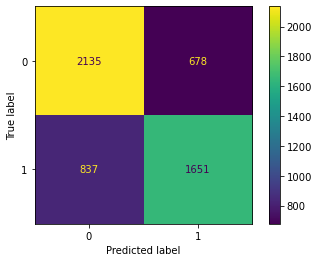

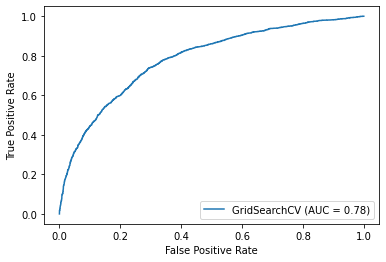

In [86]:
evaluate(gs, X_train[used_cols], X_test[used_cols], y_train, y_test)

In [87]:
gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb_sk',GradientBoostingClassifier(max_depth=2,n_estimators=10,random_state=81))
])

gb.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['respondent_id',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance',
                                                   'household_adults',
                                                   'household_children']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
       

In [88]:
print(f"Train Score: {gb.score(X_train[used_cols], y_train)}")
print(f"Test Score: {gb.score(X_test[used_cols], y_test)}")

Train Score: 0.6807319833983146
Test Score: 0.6955291454442558


In [89]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=713))
])

In [90]:

param_grid = {
    'tree__max_depth': [5, 14, 22     ],
    'tree__min_samples_leaf': [5, 14, 22]
}

In [91]:
gs = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')

# Then fit it to our X_train and y_train
gs.fit(X_train[used_cols], y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['respondent_id',
                                                                          'doctor_recc_seasonal',
                                                                          'chronic_med_condition',
                                                                          'child_under_6_months',
                                                                          'health_worker',
                                                                          'health_insurance',
                                                   

In [92]:
gs.best_params_

{'tree__max_depth': 5, 'tree__min_samples_leaf': 14}

In [93]:
gs.best_score_

0.7579537009203603

In [94]:
gs.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['respondent_id',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance',
                                                   'household_adults',
                                                   'household_children']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
       

In [95]:
gs.cv_results_

{'mean_fit_time': array([0.08656497, 0.07214193, 0.07650781, 0.09404731, 0.09887528,
        0.08581009, 0.11939917, 0.09103079, 0.09192157]),
 'std_fit_time': array([0.02828922, 0.00539422, 0.00377691, 0.0034338 , 0.00702759,
        0.00518939, 0.02481188, 0.00701823, 0.00815295]),
 'mean_score_time': array([0.01820259, 0.01552448, 0.01651039, 0.01629353, 0.01654277,
        0.01589317, 0.01898308, 0.01491637, 0.01654959]),
 'std_score_time': array([0.00324073, 0.00130848, 0.00180415, 0.00143133, 0.001484  ,
        0.00124964, 0.00195907, 0.0005875 , 0.00103277]),
 'param_tree__max_depth': masked_array(data=[5, 5, 5, 14, 14, 14, 22, 22, 22],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_tree__min_samples_leaf': masked_array(data=[5, 14, 22, 5, 14, 22, 5, 14, 22],
              mask=[False, False, False, False, False, False, False, False,
                    False],
 

In [96]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree__max_depth,param_tree__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086565,0.028289,0.018203,0.003241,5,5,"{'tree__max_depth': 5, 'tree__min_samples_leaf...",0.748168,0.763284,0.751930,0.758667,0.763550,0.757120,0.006145,3
1,0.072142,0.005394,0.015524,0.001308,5,14,"{'tree__max_depth': 5, 'tree__min_samples_leaf...",0.748683,0.763106,0.753561,0.760345,0.764074,0.757954,0.005916,1
2,0.076508,0.003777,0.016510,0.001804,5,22,"{'tree__max_depth': 5, 'tree__min_samples_leaf...",0.749673,0.762988,0.753087,0.759319,0.763761,0.757766,0.005532,2
3,0.094047,0.003434,0.016294,0.001431,14,5,"{'tree__max_depth': 14, 'tree__min_samples_lea...",0.693642,0.706979,0.695808,0.694234,0.695010,0.697135,0.004976,8
4,0.098875,0.007028,0.016543,0.001484,14,14,"{'tree__max_depth': 14, 'tree__min_samples_lea...",0.709980,0.728798,0.722164,0.731595,0.724208,0.723349,0.007464,6
5,0.085810,0.005189,0.015893,0.001250,14,22,"{'tree__max_depth': 14, 'tree__min_samples_lea...",0.729937,0.739926,0.729360,0.737143,0.740666,0.735406,0.004849,4
6,0.119399,0.024812,0.018983,0.001959,22,5,"{'tree__max_depth': 22, 'tree__min_samples_lea...",0.691360,0.687662,0.686077,0.675937,0.671530,0.682513,0.007501,9
7,0.091031,0.007018,0.014916,0.000588,22,14,"{'tree__max_depth': 22, 'tree__min_samples_lea...",0.708017,0.724147,0.722188,0.726921,0.721622,0.720579,0.006549,7
8,0.091922,0.008153,0.016550,0.001033,22,22,"{'tree__max_depth': 22, 'tree__min_samples_lea...",0.729097,0.739327,0.728312,0.737088,0.737409,0.734247,0.004596,5


In [97]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [98]:
X_train

,respondent_id,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
4504,4504,0.0,1.0,0.0,1.0,0.0,18 - 34 Years,Some College,Hispanic,Female,Below Poverty,Not Married,Own,Unemployed,2.0,2.0
22120,22120,0.0,0.0,0.0,0.0,0.0,35 - 44 Years,College Graduate,White,Female,Below Poverty,Married,Own,Employed,1.0,1.0
17539,17539,0.0,0.0,0.0,0.0,0.0,18 - 34 Years,Some College,White,Male,Above Poverty,Not Married,Rent,Unemployed,2.0,1.0
25935,25935,0.0,0.0,0.0,0.0,1.0,18 - 34 Years,< 12 Years,Other or Multiple,Female,Above Poverty,Married,Rent,Employed,1.0,0.0
6734,6734,0.0,0.0,0.0,0.0,1.0,18 - 34 Years,12 Years,Black,Female,Below Poverty,Not Married,Own,Employed,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16095,16095,0.0,1.0,0.0,1.0,0.0,45 - 54 Years,Some College,White,Female,Above Poverty,Not Married,Own,Employed,2.0,0.0
5176,5176,1.0,1.0,0.0,0.0,1.0,45 - 54 Years,College Graduate,White,Male,Above Poverty,Not Married,Own,Employed,0.0,2.0
5168,5168,1.0,0.0,0.0,0.0,1.0,55 - 64 Years,Some College,White,Female,Above Poverty,Married,Own,Unemployed,1.0,0.0
18831,18831,1.0,1.0,0.0,1.0,0.0,65+ Years,College Graduate,White,Female,Above Poverty,Married,Own,Unemployed,1.0,0.0


In [99]:
X_train_pp = preprocessor.fit_transform(X_train)

In [100]:

selector = RFE(DecisionTreeClassifier(max_depth=5, min_samples_leaf=14), n_features_to_select=5, step=1)
selector = selector.fit(X_train_pp, y_train)
selector.support_



array([False,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False])

In [101]:
X_train_pp[0]

array([-1.14417259, -0.70304196,  1.5737239 , -0.30198683,  2.76533738,
       -1.06512752,  1.45471721,  1.60496832,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  1.        ])

In [102]:
used_cols = num_columns + list(preprocessor.transformers_[1][1]['encoder'].get_feature_names(cat_columns))

In [103]:
len(selector.ranking_)

23

In [104]:
len(X_train.columns)

16

In [105]:
dict(zip(used_cols, selector.ranking_))

{'respondent_id': 5,
 'doctor_recc_seasonal': 1,
 'chronic_med_condition': 3,
 'child_under_6_months': 12,
 'health_worker': 1,
 'health_insurance': 4,
 'household_adults': 11,
 'household_children': 7,
 'age_group_35 - 44 Years': 14,
 'age_group_45 - 54 Years': 16,
 'age_group_55 - 64 Years': 1,
 'age_group_65+ Years': 1,
 'education_< 12 Years': 6,
 'education_College Graduate': 1,
 'education_Some College': 13,
 'race_Hispanic': 15,
 'race_Other or Multiple': 17,
 'race_White': 2,
 'sex_Male': 18,
 'income_poverty_Below Poverty': 10,
 'marital_status_Not Married': 8,
 'rent_or_own_Rent': 9,
 'employment_status_Unemployed': 19}

In [106]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


In [107]:
# define dataset
X, y = make_classification(n_samples=16739, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(f'Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



Accuracy: 0.935 (0.006)


In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb_sklearn', GradientBoostingClassifier(max_depth=2,
                                        n_estimators=10,
                                        random_state=81))
])

# gb_sklearn = GradientBoostingClassifier(max_depth=2,
#                                         n_estimators=10,
#                                         random_state=81)

gbc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['respondent_id',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance',
                                                   'household_adults',
                                                   'household_children']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
       

In [110]:
print(f"Train Score: {gbc.score(X_train, y_train)}")
print(f"Test Score: {gbc.score(X_test, y_test)}")

Train Score: 0.6807319833983146
Test Score: 0.6955291454442558


In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random', RandomForestClassifier(random_state=93, max_depth=5))
])

In [113]:
rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['respondent_id',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance',
                                                   'household_adults',
                                                   'household_children']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
       

In [114]:
rfc.score(X_train, y_train)

0.7097220475411898

In [115]:
rfc.score(X_test, y_test)

0.717411809092624

In [116]:
scores = cross_val_score(estimator=rfc, X=X_train,
                         y=y_train, cv=5)
print(f"Median score: {np.median(scores):.4f} (+/- {np.std(scores):.4f})")

Median score: 0.7072 (+/- 0.0080)


In [117]:
from sklearn.ensemble import ExtraTreesClassifier

In [118]:
etc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('extra', ExtraTreesClassifier(random_state=42, max_depth=5))
])

etc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['respondent_id',
                                                   'doctor_recc_seasonal',
                                                   'chronic_med_condition',
                                                   'child_under_6_months',
                                                   'health_worker',
                                                   'health_insurance',
                                                   'household_adults',
                                                   'household_children']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('encoder',
       

In [119]:
print(etc.score(X_train, y_train))
print(etc.score(X_test, y_test))

0.7084014589359829
0.7143935106583663


In [120]:
ada_gs = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('extraa', ExtraTreesClassifier(random_state=42, max_depth=5))
])

param_grid = {
    'extraa__max_depth': [3, 5, 9, 13],
    'extraa__min_samples_leaf': [1, 3, 5],
    'extraa__max_leaf_nodes':[3, 5 , 7, 11]
}

# Create our grid search
gs = GridSearchCV(estimator=ada_gs, param_grid=param_grid, cv = 5)

# Fit our grid search
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['respondent_id',
                                                                          'doctor_recc_seasonal',
                                                                          'chronic_med_condition',
                                                                          'child_under_6_months',
                                                                          'health_worker',
                                                                          'health_insurance',
                                                   

In [121]:
gs.best_score_

0.7020501246591891